## Model Tuning 



In [14]:
import numpy as np
import pandas as pd
import statsmodels as st
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, make_scorer, accuracy_score
from pandas.plotting import scatter_matrix, radviz
import matplotlib.pyplot as plt
import sklearn as sk
import xgboost as xgb
import seaborn as sns
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

# ploting style
plt.style.use('ggplot')

#### I. Data 

In [60]:
# read the data
df_data = pd.read_csv('general_film.csv', index_col= 0)

Text(600,800,'25 Percentile: 0.33\nMedian: 5.24\n75 Percentile: 42.48')

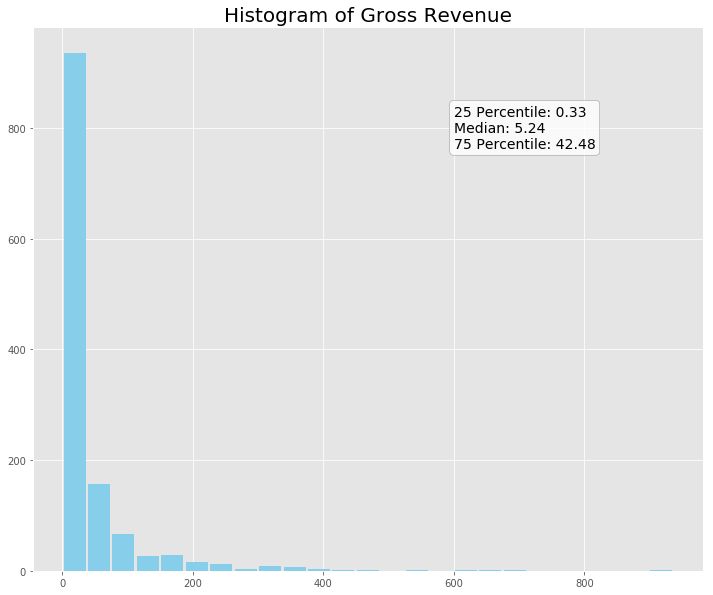

In [43]:
df_data['Gross'].hist(bins = 25,
                      color = 'skyblue',
                      figsize = (12, 10),
                      rwidth = 0.9)

plt.title('Histogram of Gross Revenue', fontsize = 20)
plt.text(600, 800, '25 Percentile: 0.33\nMedian: 5.24\n75 Percentile: 42.48',
         fontsize = 14,
         bbox=dict(boxstyle="round", fc="w",
                        ec="0.5", alpha=0.8),
         horizontalalignment='left',
         verticalalignment='center', )

In [38]:
np.percentile(df_data['Gross'], 15),\
np.percentile(df_data['Gross'], 25),\
np.percentile(df_data['Gross'], 50),\
np.percentile(df_data['Gross'], 60),\
np.percentile(df_data['Gross'], 75),\
np.percentile(df_data['Gross'], 85),\

(0.08, 0.3325, 5.24, 14.68, 42.4775, 71.903)

In [3]:
# split the data into 5 type
def gross_class(gross):
    if gross < 1:
        return 0
    elif gross < 5:
        return 1 
    elif gross < 15:
        return 2
    elif gross < 40:
        return 3
    elif gross < 70:
        return 4
    # case of large gross revenue
    
    return 5

In [67]:
df_data.drop(columns = ['description', 'genre', 'link', 'director', 'actor', 'Studio'],
             inplace= True)

In [168]:
df_data['Votes'] = df_data['Votes'].apply(lambda x : int(''.join(x.split(','))))

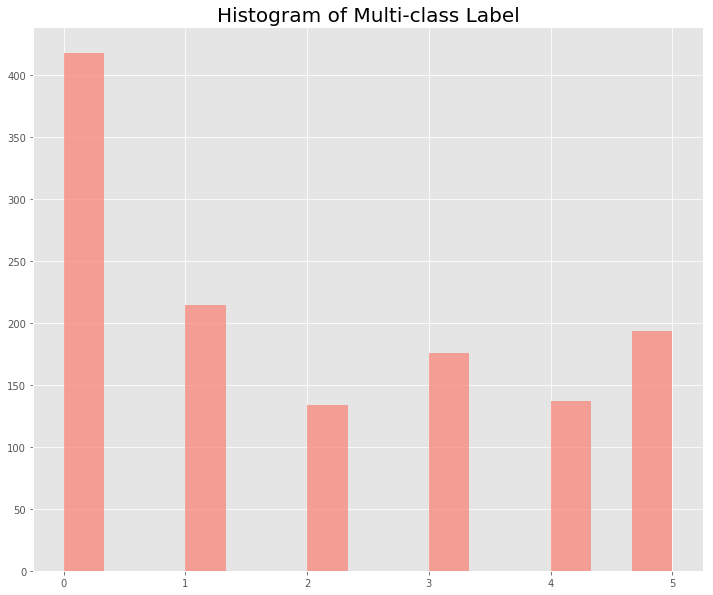

In [76]:
plt.figure(figsize = (12, 10))
plt.title('Histogram of Multi-class Label', fontsize = 20)
ax = plt.hist(label,
              color = 'salmon',
              alpha = 0.7,
              bins = 15)


In [83]:
df_data = df_data.join(pd.get_dummies(df_data['certificate']))

In [152]:
# eliminate the NaN
df_data = df_data[df_data['Release_Day'] > 0]

In [154]:
year = pd.get_dummies(df_data['Release_Day'].astype(int).astype(str))
month = pd.get_dummies(df_data['Release_Month'].astype(int).astype(str))

In [162]:
df_data = pd.concat([df_data, year, month], axis = 1)

df_feat = df_data.drop(columns = ['name', 'certificate', 'Release_date', 'Release_Year', 'Release_Month', 'Release_Day','Gross', 'Release_date'])

In [176]:
# out come
label = df_data['Gross'].apply(gross_class)

df_data.to_csv('raw_featureset.csv')

In [4]:
# reload the data
df_data = pd.read_csv('raw_featureset.csv', index_col= 0).drop(columns = ['Budget'])
df_data.dropna(inplace = True)

label = df_data['Gross'].apply(gross_class)

df_feat = df_data.drop(columns = ['name', 'certificate', 'Release_date', 'Gross'])

* split the data into train set and test set with 7:3 ratio

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, label, test_size=0.3)


### t-SNE: Unsupervised Learning

In [230]:
df_feat_uns = df_feat
df_feat_uns['lable'] = label
df_feat_uns.dropna(how = 'any', inplace= True)

In [237]:
import time
import seaborn as sns
from ggplot import *
from sklearn.manifold import TSNE

In [339]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3000, method='exact')
tsne_results = tsne.fit_transform(df_feat_uns)

df_tsne = df_feat_uns.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 687 / 687
[t-SNE] Mean sigma: 47214.102300
[t-SNE] KL divergence after 100 iterations with early exaggeration: 10.848394
[t-SNE] Error after 175 iterations: 10.848394


Text(23.3206,0.5,'Dimension 2')

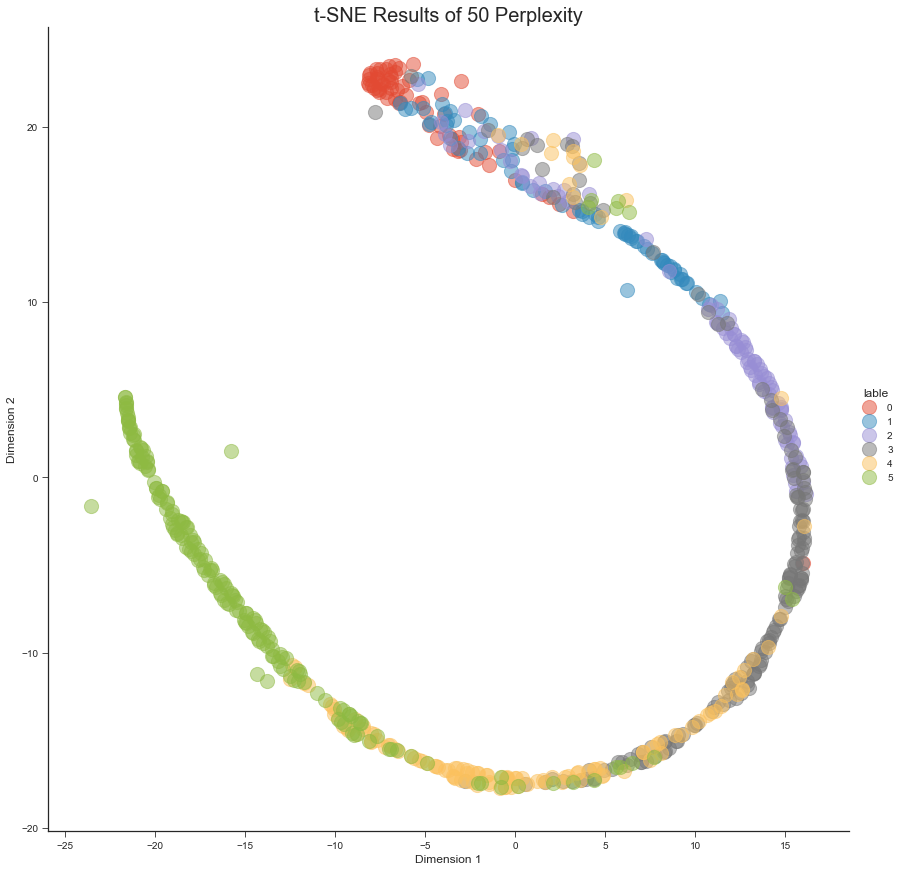

In [344]:
sns.set_style('ticks')

sns.lmplot(x = 'x-tsne',
           y = 'y-tsne',
           size = 12,
           data = df_tsne,
           scatter_kws = {'s':200, 'alpha':0.5},
           fit_reg = False,
           legend = True,
           hue = 'lable')

plt.title('t-SNE Results of 50 Perplexity', fontsize = 20)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

#### SVM

In [16]:
from sklearn.svm import SVC  

* Linear Kernel

In [ ]:
svm_clf = SVC(kernel='linear')  

svm_clf.fit(X_train, y_train)  

In [ ]:
# evaluate at test set
y_pred = svclassifier.predict(X_test)  

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

* Gaussian Kernel

In [ ]:
sv_clf_gaus = SVC(kernel='rbf')  
sv_clf_gaus.fit(X_train, y_train)  

# prediction
y_pred = svclassifier.predict(X_test) 

# evaluate at test set
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

### Gaussian Naive Bayes 
The Naive Bayes classifier aggregates information using conditional probability with an assumption of independence among features.

In [9]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

             precision    recall  f1-score   support

          0       0.75      0.89      0.81        64
          1       0.64      0.57      0.61        40
          2       0.61      0.46      0.52        37
          3       0.46      0.63      0.53        38
          4       0.61      0.61      0.61        46
          5       0.94      0.75      0.84        65

avg / total       0.70      0.68      0.68       290



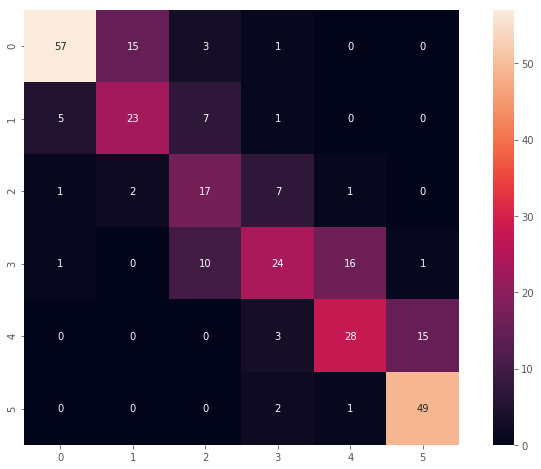

In [21]:
gaus_nb = GaussianNB()

# fit the dataset
gaus_nb.fit(X_train, y_train)

# prediction
y_pred = gaus_nb.predict(X_test)

# evaluate at test set
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (12,8))
sns.heatmap(mat.T, square=True, annot=True,fmt='d',  cbar = True)


print(classification_report(y_test,y_pred))  

### Artificial Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier

* data standradization

In [23]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train_scal = X_train.copy()

# fit only on training data
scaler.fit(X_train_scal)  

# apply transformation to train data
X_train_scal = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scal = scaler.transform(X_test)  

In [69]:
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-3,
                    max_iter= 10000, 
                    hidden_layer_sizes=(128, 16))

clf.fit(X_train_scal, y_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

* Evaluation

             precision    recall  f1-score   support

          0       0.62      0.53      0.57        64
          1       0.28      0.40      0.33        40
          2       0.41      0.32      0.36        37
          3       0.32      0.42      0.36        38
          4       0.61      0.41      0.49        46
          5       0.85      0.89      0.87        65

avg / total       0.56      0.53      0.54       290



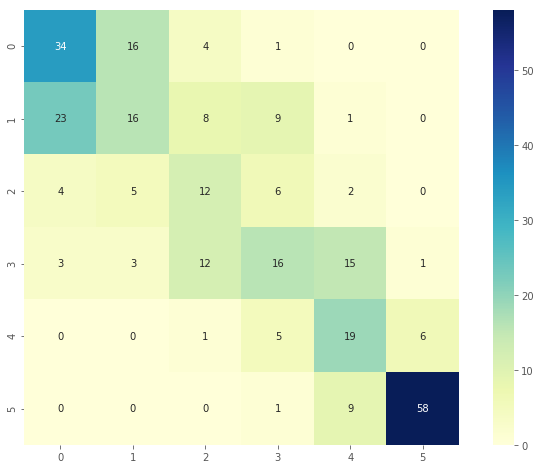

In [71]:
y_pred = clf.predict(X_test_scal)

# evaluate at test set
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (12,8))
sns.heatmap(mat.T, square=True, annot=True,fmt='d', cmap="YlGnBu", cbar = True)


print(classification_report(y_test,y_pred))  

### Boosting Tree : XGBOOST  
Discrete Classifier

**Grid Search**

Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [352]:
# parameter grid
xgb_param_grid = {
                  #'colsample_bytree': np.linspace(0.1, 0.9, 9),
                  #'subsample': np.linspace(0.1, 0.9, 9),
                  #'max_depth': range(1, 10), 'min_child_weight': range(1, 10)
                  'learning_rate' : [0.0001, 0.0005, 0.001, 0.005, 0.1],
                  'n_estimators' : [100, 150, 500, 1000, 1500, 2000]
                  }

In [353]:
# parameter
optimal_para = {
                'max_depth': 6, 'min_child_weight': 2,
                'colsample_bytree': 0.9, 'subsample': 0.7, 
                'gamma' : 0.8,
                #'learning_rate' : 0.0001, 'n_estimators' : 1000
                }


xgb_clf = xgb.XGBClassifier(**optimal_para)

In [354]:
%%time

#Grid Search
grid = GridSearchCV(xgb_clf,
                    param_grid=xgb_param_grid,
                    cv=3,
                    verbose= 2,
                    scoring= 'f1_macro')

grid.fit(X_train, y_train)

grid.best_params_, grid.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] learning_rate=0.0001, n_estimators=100 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=100, total=   1.0s
[CV] learning_rate=0.0001, n_estimators=100 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........... learning_rate=0.0001, n_estimators=100, total=   0.9s
[CV] learning_rate=0.0001, n_estimators=100 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=100, total=   0.9s
[CV] learning_rate=0.0001, n_estimators=150 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=150, total=   1.4s
[CV] learning_rate=0.0001, n_estimators=150 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=150, total=   1.4s
[CV] learning_rate=0.0001, n_estimators=150 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=150, total=   1.5s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=   4.8s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] ........... learning_rate=0.0001, n_estimators=500, total=   4.6s
[CV] learning_rate=0.0001, n_estimators=500 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 12.2min finished


CPU times: user 12min 7s, sys: 3.34 s, total: 12min 10s
Wall time: 12min 16s


In [351]:
grid.best_params_, grid.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7000000000000001},
 0.6962033595530135)

In [182]:
def convert_grid_scores(scores):
    _params = []
    _params_score = []    
    for i in scores:
        _params.append(i[0].values())
        _params_score.append(i[1])
    params = np.array(_params)
    grid_res = np.column_stack((_params,_params_score))
    
    return [grid_res[:,i] for i in range(grid_res.shape[1])]

###### Max_Depth & Min_Child_Weight 

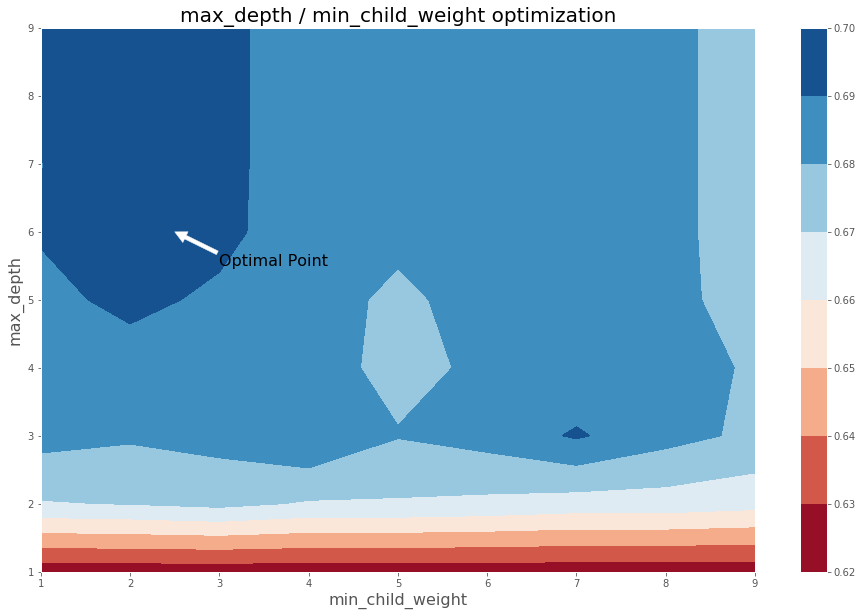

In [189]:
_, depth_wt_scores =  convert_grid_scores(grid.grid_scores_)
scores = depth_wt_scores.reshape(9,9)

plt.figure(figsize=(16,10))
cp = plt.contourf(xgb_param_grid['min_child_weight'],
                  xgb_param_grid['max_depth'],
                  scores,
                  cmap='RdBu')

plt.colorbar(cp)
plt.title('max_depth / min_child_weight optimization', fontsize = 20)
plt.annotate('Optimal Point', xy=(2.5, 6), 
             xytext=(3, 5.5),
             arrowprops=dict(facecolor='white'),
             size = 16,
             color='k')

plt.xlabel('min_child_weight', fontsize = 16)
plt.ylabel('max_depth', fontsize = 16)
plt.grid(True)
plt.show()

######  colsample_bytree & subsample

In [77]:
_, sample_scores =  convert_grid_scores(grid.grid_scores_)
sample_scores = sample_scores.reshape(10,10)

In [ ]:
plt.figure(figsize=(12,8))
cp = plt.contourf(xgb_param_grid['colsample_bytree'],
                  xgb_param_grid['subsample'],
                  sample_scores,
                  cmap='RdBu')

plt.colorbar(cp)
plt.title('colsample_bytree / subsample optimization')
plt.annotate('Optimal Point', xy=(0.8, 0.9), 
             xytext=(0.8, 0.8),
             arrowprops=dict(facecolor='white'),
             size = 12,
             color='k')

plt.xlabel('colsample_bytree')
plt.ylabel('subsample')
plt.grid(True)
plt.show()

Model Training

In [193]:
# model with optimal para.
xgb_mod = xgb.XGBClassifier(**optimal_para)

# fit the para.
xgb_mod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.8, learning_rate=0.0001,
       max_delta_step=0, max_depth=6, min_child_weight=2, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

Evaluation

In [194]:
# training 
y_fit = xgb_mod.predict(X_train) 

In [196]:
print(classification_report(y_fit, y_train))

             precision    recall  f1-score   support

          0       0.97      0.87      0.92       326
          1       0.79      0.80      0.80       156
          2       0.69      0.85      0.76        72
          3       0.83      0.81      0.82       126
          4       0.77      0.84      0.80        90
          5       0.90      0.97      0.94       119

avg / total       0.87      0.86      0.86       889



In [197]:
# out of sample
y_pred = xgb_mod.predict(X_test)

In [198]:
# accuracy
accuracy_score(y_pred, y_test)

0.7591623036649214

In [199]:
# comprehensive matrics
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.92      0.85      0.88       135
          1       0.68      0.56      0.61        68
          2       0.53      0.71      0.61        34
          3       0.70      0.70      0.70        53
          4       0.58      0.71      0.64        31
          5       0.83      0.89      0.86        61

avg / total       0.77      0.76      0.76       382



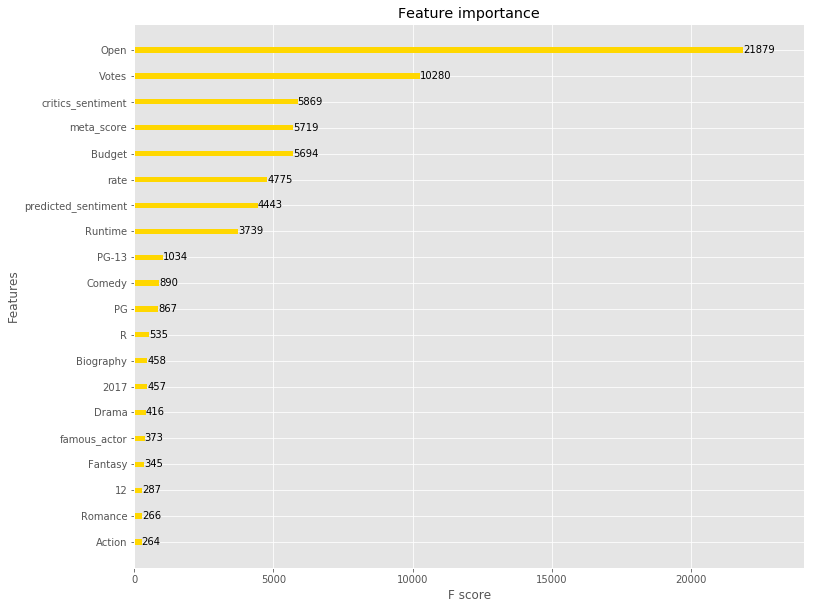

In [206]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title('Feature Importance for Gross Revenue XGBoost Model')
xgb.plot_importance(xgb_mod,
                    ax=ax,
                    color = 'gold',
                    max_num_features= 20)

### Random Forest

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [179]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)